# 01 Data Exploration

Explore the artist dataset: authentic and imitation images. Visualize, inspect class balance, and basic statistics.

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 01 Data Exploration
# Load dataset paths and visualize a few authentic/imitation samples. Need to edit this once we have images ready. 
DATA_ROOT = '../dataset/data/van_gogh'
classes = ['authentic', 'imitation']

data = []
for label in classes:
    folder = os.path.join(DATA_ROOT, label)
    for fname in os.listdir(folder):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            data.append({'filepath': os.path.join(folder, fname), 'label': label})
df = pd.DataFrame(data)
print(f"Total images: {len(df)}")
df.head()

Total images: 1194


,filepath,label
0,../dataset/data/van_gogh/authentic/vangogh_549...,authentic
1,../dataset/data/van_gogh/authentic/vangogh_137...,authentic
2,../dataset/data/van_gogh/authentic/vangogh_136...,authentic
3,../dataset/data/van_gogh/authentic/vangogh_140...,authentic
4,../dataset/data/van_gogh/authentic/vangogh_135...,authentic


# 01 Visualize Random Samples

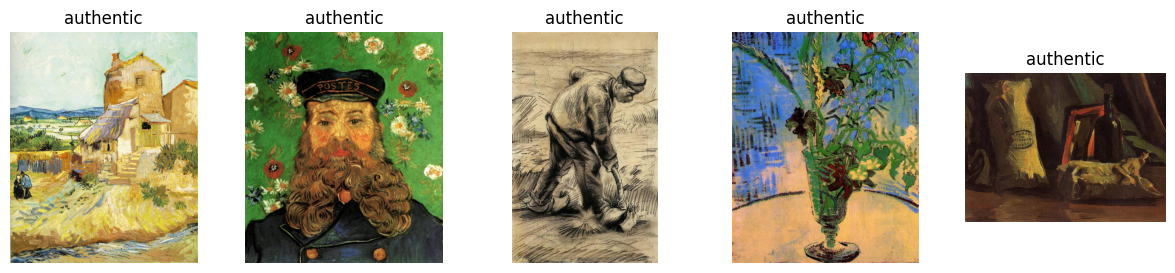

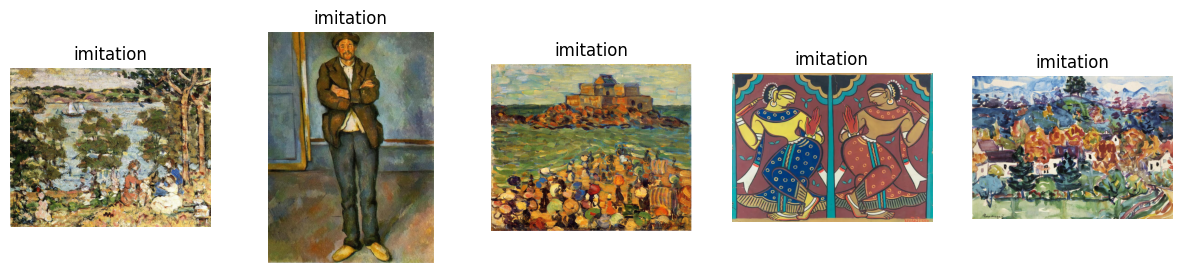

In [3]:
# Visualize Random Samples
def show_samples(df, label, n=5):
    num_samples = min(n, len(df[df['label'] == label]))
    samples = df[df['label'] == label].sample(n=num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(3 * num_samples, 3))
    # Ensure axes is iterable even if num_samples == 1
    if num_samples == 1:
        axes = [axes]
    for ax, (_, row) in zip(axes, samples.iterrows()):
        img = Image.open(row['filepath'])
        ax.imshow(np.asarray(img))
        ax.axis('off')
        ax.set_title(label)
    plt.show()

show_samples(df, 'authentic')
show_samples(df, 'imitation')

# 01 Data Exploration

## Plot Class Distribution

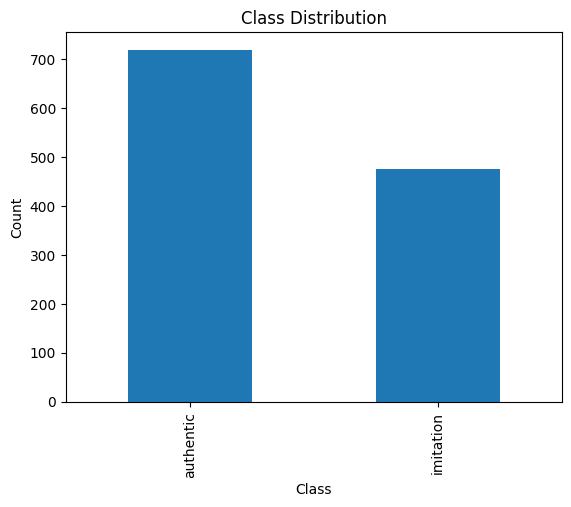

In [4]:
df['label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 01 Data Exploration

## Basic Statistics and Error Checking

In [5]:
print('Number of authentic:', (df['label'] == 'authentic').sum())
print('Number of imitation:', (df['label'] == 'imitation').sum())
print('Missing files:', df[~df['filepath'].apply(os.path.exists)])

Number of authentic: 719
Number of imitation: 475
Missing files: Empty DataFrame
Columns: [filepath, label]
Index: []
